Delhi House Price Prediction

The aim of this project to predict the price of the houses in Delhi, in various localities, based on the data present in the dataset. The dataset is from Kaggle. The project aims to predicts the house price, by analysing the features such as area, number of bedrooms, locality and many more. The dataset has 1214 rows and 13 columns.

In [7]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
# importing dataset
df = pd.read_csv('house pricing delhi- MagicBricks.csv')
df.head()

,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
0,950.0,2,2.0,Furnished,Karol Bagh,Central Delhi,"DDA MIG Flats Prasad Nagar Phase 2, Prasad Nag...",1.0,Ready_to_move,Resale,Apartment,8761.0,12500000
1,535.0,2,1.0,Furnished,Karol Bagh,Central Delhi,"Dev Nagar, Karol Bagh",1.0,Ready_to_move,New_Property,Apartment,7290.0,3900000
2,1280.0,3,3.0,Furnished,Karol Bagh,Central Delhi,Karol Bagh,2.0,Ready_to_move,Resale,Builder_Floor,14092.0,15000000
3,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,22222.0,25000000
4,1135.0,3,3.0,Furnished,Karol Bagh,Central Delhi,"The Amaryllis, Karol Bagh",2.0,Almost_ready,Resale,Apartment,22222.0,25000000


In [9]:
# checking rows and columns in dataset
df.shape

(1214, 13)

In [10]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       0
Location         0
District         0
Locality         0
Parking         32
Status           0
Transaction      0
Type             5
Per_Sqft       241
Price            0
dtype: int64

In [11]:
# Replacing missing values in per_sqft with 'price/area'
df['Per_Sqft'] = df['Price']/df['Area']
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Price']/df['Area'])


# Replacing missing values in bathroom, parking and type with mode of respective values
for col in ['Bathroom', 'Parking', 'Type']:
  df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Location       0
District       0
Locality       0
Parking        0
Status         0
Transaction    0
Type           0
Per_Sqft       0
Price          0
dtype: int64

In [12]:
# type casting bathroom , parking into integers and price into float
df['Bathroom'] = df['Bathroom'].astype(int)
df['Parking'] = df['Parking'].astype(int)
df.dtypes

Area           float64
BHK              int64
Bathroom         int32
Furnishing      object
Location        object
District        object
Locality        object
Parking          int32
Status          object
Transaction     object
Type            object
Per_Sqft       float64
Price            int64
dtype: object

In [13]:
df.nunique()

Area           297
BHK              8
Bathroom         7
Furnishing       3
Location        35
District         9
Locality       352
Parking          8
Status           2
Transaction      2
Type             2
Per_Sqft       764
Price          274
dtype: int64

In [14]:
# prompt: value count of each value in each variable

for col in df.columns:
  print(f"Value counts for column '{col}':")
  print(df[col].value_counts())
  print("\n" + "="*30 + "\n")

Value counts for column 'Area':
Area
900.0      65
1500.0     49
1800.0     45
1000.0     42
1600.0     38
           ..
1290.0      1
437.0       1
4350.0      1
24300.0     1
2070.0      1
Name: count, Length: 297, dtype: int64


Value counts for column 'BHK':
BHK
3     523
2     356
4     212
1      96
5      19
6       6
7       1
10      1
Name: count, dtype: int64


Value counts for column 'Bathroom':
Bathroom
2    544
3    339
1    144
4    131
5     49
6      4
7      3
Name: count, dtype: int64


Value counts for column 'Furnishing':
Furnishing
Semi-Furnished    677
Unfurnished       361
Furnished         176
Name: count, dtype: int64


Value counts for column 'Location':
Location
Lajpat Nagar          90
Dwarka                87
Shahdara              75
Rohini                75
Alaknanda             57
Greater Kailash       43
Okhla                 36
Laxmi Nagar           34
Patel Nagar           34
Vasant Kunj           33
Karol Bagh            32
Friends Colony        31
K

In [15]:
df['Area_Yards'] = df['Area']/9

In [16]:
df['Locality'].unique()

array(['DDA MIG Flats Prasad Nagar Phase 2, Prasad Nagar, Karol Bagh',
       'Dev Nagar, Karol Bagh', 'Karol Bagh', 'The Amaryllis, Karol Bagh',
       'Abul Fazal Enclave Part-II, Okhla', 'Bank Enclave, Laxmi Nagar',
       'Capital Apartment, Vasundhara Enclave',
       'DDA Flats Block A, Dilshad Garden',
       'DDA Pocket I, Dilshad Garden', 'Dilshad Colony, Dilshad Garden',
       'Dilshad Garden', 'Geeta Colony', 'Godrej South Estate, Okhla',
       'Laxmi Nagar',
       "Laxmi Nagar carpet area 1000 sqft status Ready to Move floor 1 out of 4 floors transaction Resale furnishing Furnished bathroom 3 balcony 1 It's a 1st floor Builder Floor Apartment in a building of total 4 floors. The age of construction for this Builder Floor Apartment is between 10 to 15 years. The location has easy access to, Dena Bank (0 km ), Delhi Convent School (0 km ), DDA Market (0 km ) and Nirman Vihar Metro Station (2 km ). read more Contact Owner View Phone No. Share Feedback Owner Vipul Jain",
   

In [17]:
# take out top 10 unique locations based on house count

top_locations = df['Location'].value_counts().nlargest(10).index.tolist()
top_locations

['Lajpat Nagar',
 'Dwarka',
 'Shahdara',
 'Rohini',
 'Alaknanda',
 'Greater Kailash',
 'Okhla',
 'Laxmi Nagar',
 'Patel Nagar',
 'Vasant Kunj']

Taking 10 localities only and listing other localities as other

In [19]:
def grp_local(locality):
 locality = locality.lower() # avoid case sensitive
 if 'rohini' in locality:
  return 'Rohini Sector'
 elif 'dwarka' in locality:
  return 'Dwarka Sector'
 elif 'shahdara' in locality:
  return 'Shahdara'
 elif 'vasant' in locality:
  return 'Vasant Kunj'
 elif 'okhla' in locality:
  return 'Okhla'
 elif 'alaknanda' in locality:
  return 'Alaknanda'
 elif 'karol bagh' in locality:
  return 'Karol Bagh'
 elif 'greater kailash' in locality:
  return 'Greater Kailash' 
 elif 'laxmi nagar' in locality:
  return 'Laxmi Nagar'
 elif 'lajpat' in locality:
  return 'Lajpat Nagar'
 else:
  return 'Other'
df['Locality'] = df['Locality'].apply(grp_local)

In [20]:
df['Locality'].value_counts()

Locality
Other              655
Lajpat Nagar        90
Dwarka Sector       86
Rohini Sector       75
Shahdara            75
Alaknanda           58
Greater Kailash     42
Okhla               34
Laxmi Nagar         34
Vasant Kunj         33
Karol Bagh          32
Name: count, dtype: int64

In [21]:
# Using Z - score to remove outliers
from scipy import stats
# Z score
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes != 'object'].index]))
# Removing outliers
df = df[(z < 3).all(axis=1)]

In [22]:
z

,Area,BHK,Bathroom,Parking,Per_Sqft,Price,Area_Yards
0,0.316461,0.822487,0.514479,0.122242,0.061854,0.324147,0.316461
1,0.578156,0.822487,1.498066,0.122242,0.345555,0.660051,0.578156
2,0.108367,0.234126,0.469108,0.055060,0.131431,0.226500,0.108367
3,0.199803,0.234126,0.469108,0.055060,0.366901,0.164086,0.199803
4,0.199803,0.234126,0.469108,0.055060,0.366901,0.164086,0.199803
...,...,...,...,...,...,...,...
1209,2.040680,2.347351,1.452695,0.122242,0.694225,4.460537,2.040680
1210,1.544406,1.290738,1.452695,0.122242,0.454581,2.820074,1.544406
1211,0.538617,0.234126,0.469108,0.122242,0.497032,1.413963,0.538617
1212,0.489873,0.822487,1.498066,0.122242,0.490274,0.699110,0.489873


In [23]:
df.describe()

,Area,BHK,Bathroom,Parking,Per_Sqft,Price,Area_Yards
count,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1.162000e+03,1162.000000
mean,1298.934434,2.714286,2.457831,1.393287,12640.850998,1.830879e+07,144.326048
std,765.233389,0.864230,0.946654,0.708790,7889.381016,1.778361e+07,85.025932
min,50.000000,1.000000,1.000000,1.000000,204.081633,1.000000e+06,5.555556
25%,800.000000,2.000000,2.000000,1.000000,6666.666667,5.500000e+06,88.888889
50%,1150.000000,3.000000,2.000000,1.000000,11231.893049,1.350000e+07,127.777778
75%,1600.000000,3.000000,3.000000,2.000000,16580.668088,2.400000e+07,177.777778
max,5220.000000,5.000000,5.000000,10.000000,70000.000000,9.300000e+07,580.000000


In [24]:
df.head(10)

,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price,Area_Yards
0,950.0,2,2,Furnished,Karol Bagh,Central Delhi,Karol Bagh,1,Ready_to_move,Resale,Apartment,13157.894737,12500000,105.555556
1,535.0,2,1,Furnished,Karol Bagh,Central Delhi,Karol Bagh,1,Ready_to_move,New_Property,Apartment,7289.719626,3900000,59.444444
2,1280.0,3,3,Furnished,Karol Bagh,Central Delhi,Karol Bagh,2,Ready_to_move,Resale,Builder_Floor,11718.750000,15000000,142.222222
3,1135.0,3,3,Furnished,Karol Bagh,Central Delhi,Karol Bagh,2,Almost_ready,Resale,Apartment,22026.431718,25000000,126.111111
4,1135.0,3,3,Furnished,Karol Bagh,Central Delhi,Karol Bagh,2,Almost_ready,Resale,Apartment,22026.431718,25000000,126.111111
5,1135.0,3,3,Furnished,Karol Bagh,Central Delhi,Karol Bagh,2,Almost_ready,Resale,Apartment,22026.431718,25000000,126.111111
6,1135.0,3,3,Furnished,Karol Bagh,Central Delhi,Karol Bagh,2,Almost_ready,Resale,Apartment,21585.903084,24500000,126.111111
7,900.0,3,2,Furnished,Okhla,East Delhi,Okhla,1,Ready_to_move,Resale,Builder_Floor,6111.111111,5500000,100.000000
9,1500.0,3,3,Furnished,Vasundhara,East Delhi,Other,2,Ready_to_move,Resale,Apartment,10000.000000,15000000,166.666667
10,1000.0,3,2,Furnished,Dilshad Garden,East Delhi,Other,1,Ready_to_move,Resale,Apartment,9200.000000,9200000,111.111111


Exploratory Data Analysis

AREA

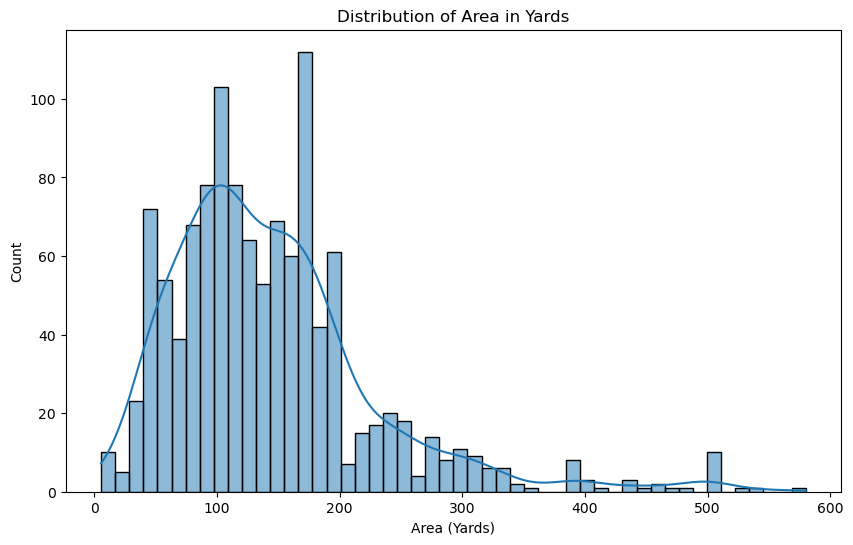

In [27]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Area_Yards'], bins=50, kde=True)
plt.xlabel('Area (Yards)')
plt.ylabel('Count')
plt.title('Distribution of Area in Yards')
plt.show()

Looking at the distribution of Area of houses in delhi most of the houses have area
between 80 - 200 sq. yards. This means that most of the houses in delhi are small
houses and there are few house having area near 300 sq yards. Whereas thery are
very few houses having area more than 400 sq yards. This representation helps us to
know about availability of space in delhi.


BHK

Text(0.5, 1.0, 'BHK')

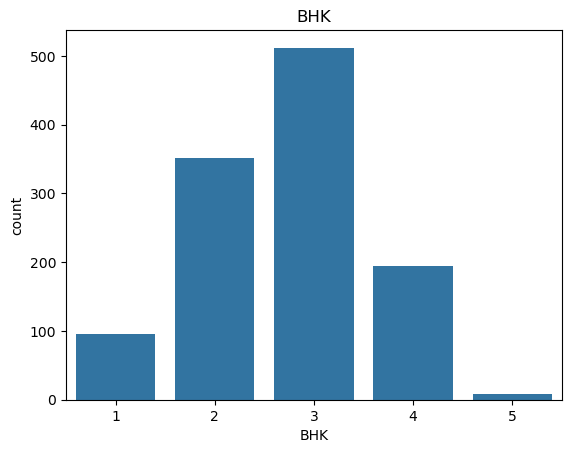

In [30]:
sns.countplot(x = 'BHK', data = df).set_title('BHK')

BHK - Bedroom Hall Kitchen. From this graph we can get a little idea about the
design of most of houses in delhi. Most of houses are 3 BHK followed by 2, 4, 1 and 5
BHK houses. Majority of the houses have area between 80-200 sq. yards. Houses
with area near 200 yards can have maximum 3 bedrooms, for houses with area near
100 can have 2 bedrooms and 1 bedroom for houses with area less than 80 sq yards.
Moreover whoses having area more than 300 are less in number so the count of
4BHK and 5BHK. Thus, there is a relation between the BHK and area of house, with
this relation we can get a idea about the structure of houses.

BATHROOM COUNT

Text(0.5, 1.0, 'Bathroom')

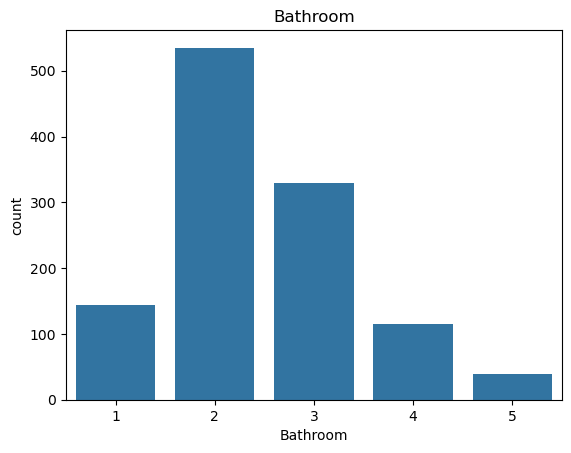

In [33]:
sns.countplot(x = 'Bathroom', data = df).set_title('Bathroom')

Majority of the houses have 2 bathrooms which, is quite obvious. However there
some houses having 3 or more than 3 bathrooms, which is means these houses are
quite big and spacious to have 3 or more bathrooms. Smaller houses usually have 1
bathroom.

FURNISHING

Text(0.5, 1.0, 'Furnishing')

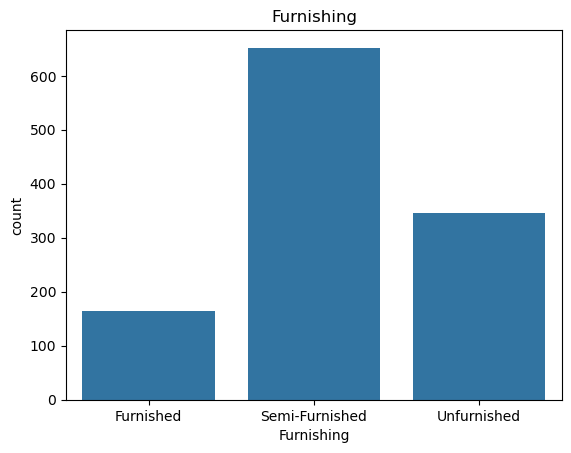

In [36]:
sns.countplot(x='Furnishing',data=df).set_title('Furnishing')

Delhi is very close captial of India, New Delhi and many people migrate from various
regions of the country mostly for employment reasons to this region. As these people
look for accomodations, the furnishing of the houses play a major role. People who
are migrationg from huge distances cannot afford to move their furniture and other
household items. Hence, they look for fully furnished houses. Similarly the people
from neighbouring states might prefer semi-furnished houses, whereas Delhi locals
who are moving to some other reason might prefer unfurnished houses. Hence, the
furnishing of the house plays a major role in the price of the house. Hence, we have
included this feature in our dataset

LOCALITY

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Karol Bagh'),
  Text(1, 0, 'Okhla'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Laxmi Nagar'),
  Text(4, 0, 'Rohini Sector'),
  Text(5, 0, 'Shahdara'),
  Text(6, 0, 'Alaknanda'),
  Text(7, 0, 'Lajpat Nagar'),
  Text(8, 0, 'Vasant Kunj'),
  Text(9, 0, 'Dwarka Sector'),
  Text(10, 0, 'Greater Kailash')])

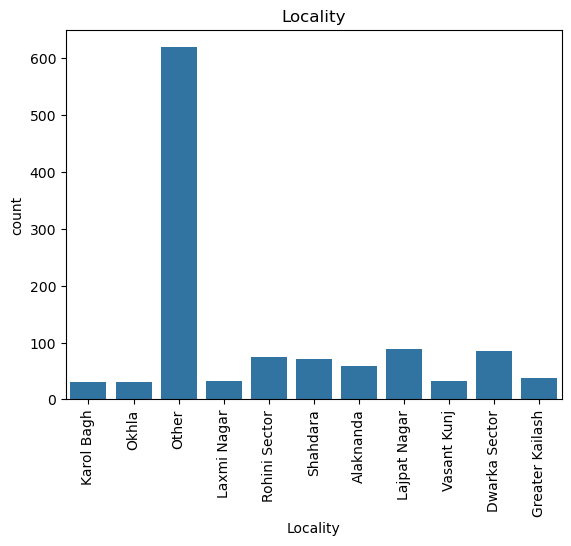

In [39]:
sns.countplot(x = 'Locality', data = df).set_title('Locality')
plt.xticks(rotation = 90)

Since there are so many localities and address in the dataset, I have group nearly half
of them in the top ten localities (count wise), and the remaining localities are grouped
as 'Others'. Upon visualizing the locality on the graph, we can se that after the
'Other' category, the Lajpat Nagar has highest number of houses followed by Dwarka Sector and Rohini Sector. From this info, I assume that these localities are good to
settle in Delhi. In addition to that localities such as Shahdara and Alaknanda are have
significant number of houses as well. So, these localities are also good to settle in
Delhi.

PARKING

Text(0.5, 1.0, 'Parking')

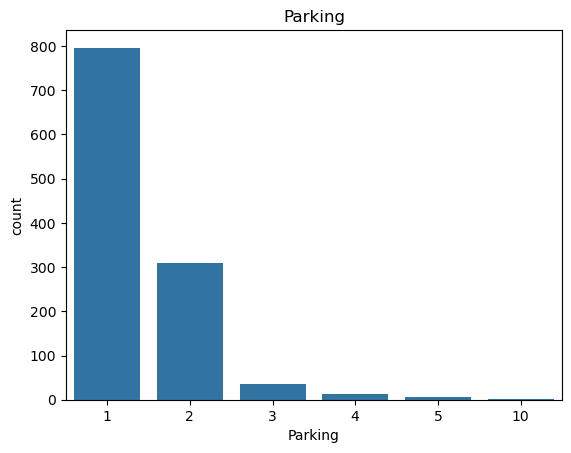

In [42]:
sns.countplot(x = 'Parking', data = df).set_title('Parking')

Majority of the houses in Delhi has one car parking which is quite common. Few of
the houses have enough space for two car parking and very few houses have more
than two car parking space. We can relate this graph to the graph with house area,
where majority of the houses have area between 100 -200 sq. yards. So, it is quite
obvious than these house will have one car parking space. The houses with area
more than 200 sq. yards will have more than one car parking space.

STATUS

Text(0.5, 1.0, 'Status of the Property')

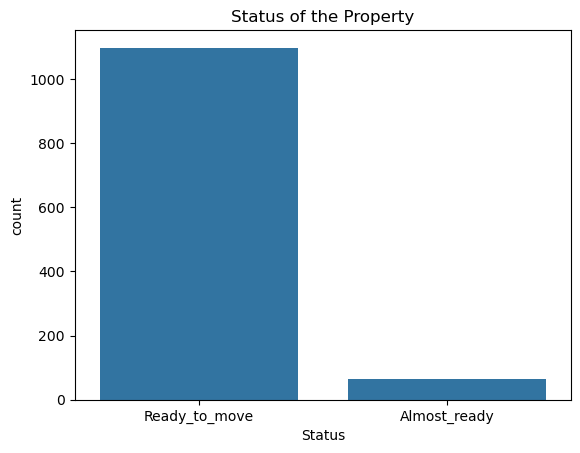

In [45]:
sns.countplot(x = 'Status', data = df).set_title('Status of the Property')

Most of the houses are ready to move and actively looking for buyers. Very few
houses are still under construction and would be ready to move soon.

TRANSACTION TYPE

Text(0.5, 1.0, 'Transaction Type')

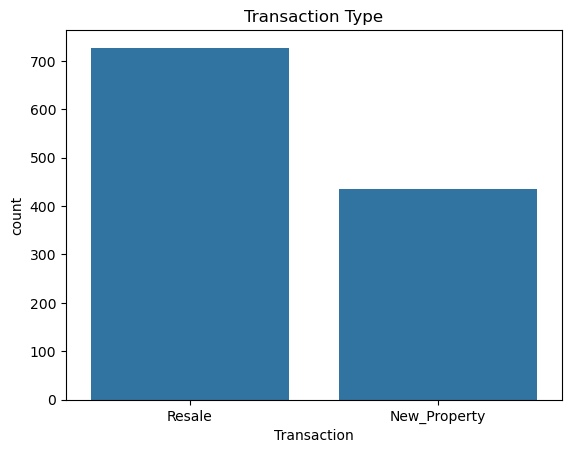

In [48]:
sns.countplot(x='Transaction', data=df).set_title('Transaction Type')

A huge number of houses are resale type, which means a lot of people are moving
out of Delhi. This could be due to the high pollution levels or some other reason. This
could be a good opportunity for people who are looking to buy a house in Delhi.
Nearly 430 houses are new property houses which are built with only purpose to be
commericially sold.

HOUSE TYPE

Text(0.5, 1.0, 'Type of House')

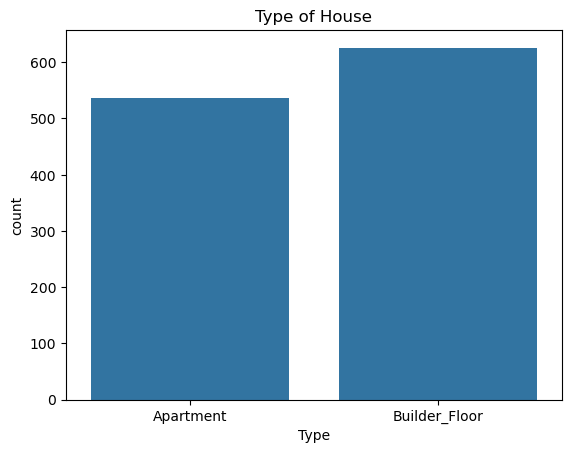

In [51]:
sns.countplot(x='Type',data=df).set_title('Type of House')

Most of the houses are builder floor which means people like to live in independent
houses rather than apartments, due to the privacy and space they get in independent
houses.

Till now, I have visualize the distribution of data across variables in the dataset. Now, I will be looking at the realtion between the target variable i.e Price and independent
variables.

Area and Price

<Axes: xlabel='Area_Yards', ylabel='Price'>

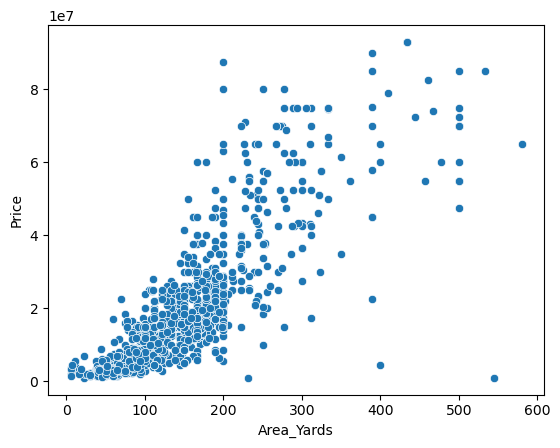

In [55]:
sns.scatterplot(x = 'Area_Yards', y = 'Price', data = df)

BHK and Price

Text(0.5, 1.0, 'BHK vs Price')

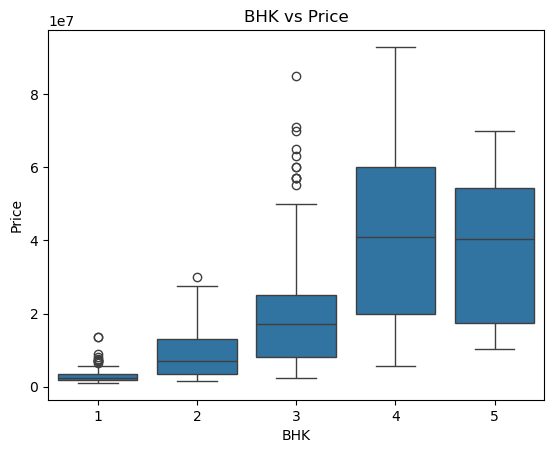

In [57]:
sns.boxplot(x = 'BHK', y = 'Price', data = df).set_title('BHK vs Price')

From this boxplot, we get to know about the relation between the price of the house
and the BHK count. We can see that the price of the house increases with the
increase in the BHK count, which evident from the fact that 5 BHK houses have the
highes median price i.e. nearly 7,00,00,000 INR followed by 4 BHK houses with
median price of nearly 4,00,00,000 INR. Incomparison to that, 3BHK houses have
median price near about 1 crore INR and 2BHK houses have median price of nearly
50,00,000 INR. The 1BHK houses have the lowest median price of nearly 30,00,000
INR.

Bathroom count and Price

Text(0.5, 1.0, 'Bathroom vs Price')

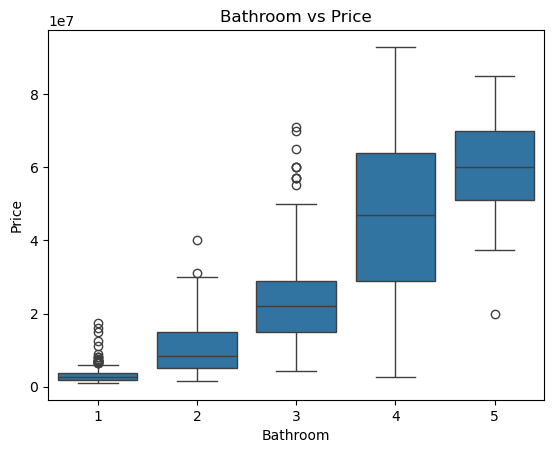

In [60]:
sns.boxplot(x = 'Bathroom', y = 'Price', data = df).set_title('Bathroom vs Price')

Parking and Price

Text(0.5, 1.0, 'Parking vs Price')

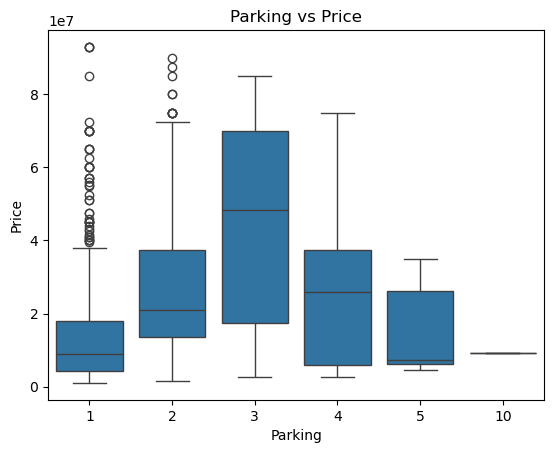

In [62]:
sns.boxplot(x = 'Parking', y = 'Price', data = df).set_title('Parking vs Price')

This boxplot graphs shows the relationship between the parking space and the price
of the house. Houses with 3 parking spaces has highest median price which is
4,50,00,000, followed by 3 parking space, 2 parking space and 1 parking space. From
this graph, we can assume that people usually look for the houses to have sufficient
parking space, which means they don't want more than enough space for parking
which evident throught the lower median price of houses with 4 parking space or
more.

Locality and Price

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Karol Bagh'),
  Text(1, 0, 'Okhla'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Laxmi Nagar'),
  Text(4, 0, 'Rohini Sector'),
  Text(5, 0, 'Shahdara'),
  Text(6, 0, 'Alaknanda'),
  Text(7, 0, 'Lajpat Nagar'),
  Text(8, 0, 'Vasant Kunj'),
  Text(9, 0, 'Dwarka Sector'),
  Text(10, 0, 'Greater Kailash')])

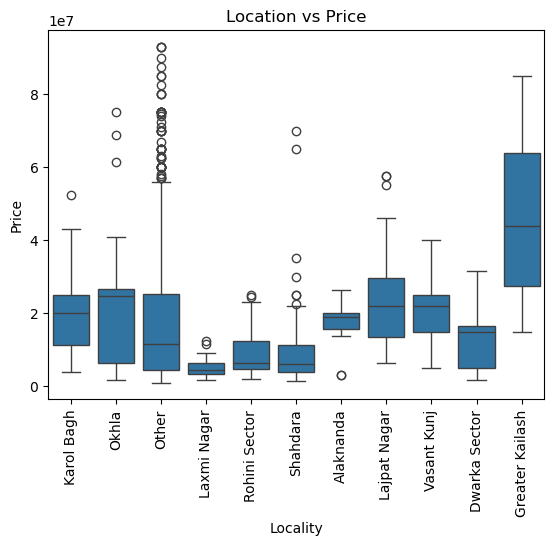

In [65]:
sns.boxplot(x='Locality', y='Price', data=df).set_title('Location vs Price')
plt.xticks(rotation=90)

From this graph, we can get idea about the localities along with the house price.
Greater Kilash locality has the highest median price of nearly 4,50,00,000 INR, which
means this is a posh locality. Greater Kilash is followed by Lagpat Nagar and Vasant
Kunj. These two localities can be included in the posh locality. Though Okhla is not considered as posh locality its median price is high. The localities with
lowest median prices includes - Rohini Sector, Laxmi Nagar and Shahdara.
Some of the mediocre localities are - Dwarka Sectors and the
rest of the localities are average.

Furnishing and Price

Text(0.5, 1.0, 'Furnishing vs Price')

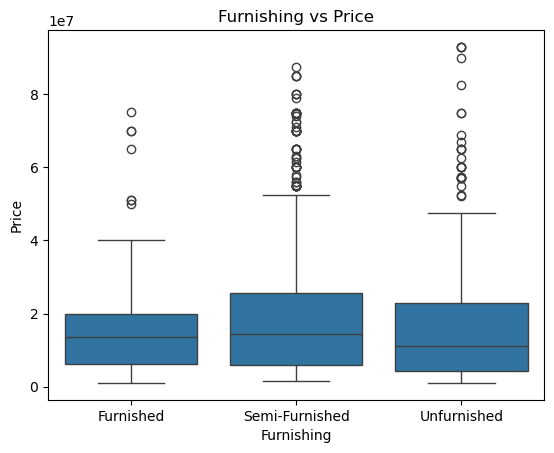

In [68]:
sns.boxplot(x = 'Furnishing', y = 'Price', data = df).set_title('Furnishing vs Price')


There is very little difference in the median house price based on the furnishing
status. Interestingly, the furnished houses have a lower median price than the semifurnished houses. The unfurnished houses have the lowest median price.

Status and Price

Text(0.5, 1.0, 'Status and Price')

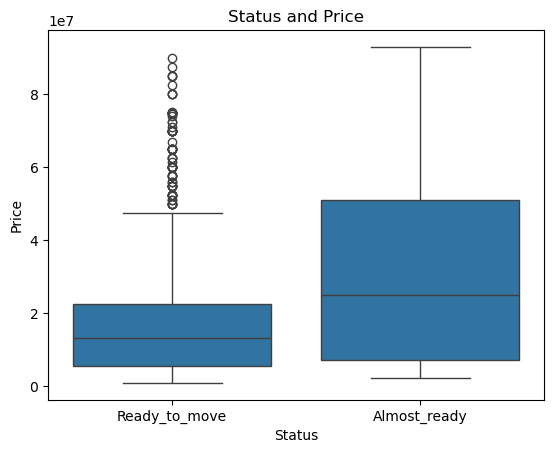

In [71]:
sns.boxplot(x = 'Status', y = 'Price', data = df).set_title('Status and Price')

Surprisingly the houses that are still under construction have higher median price
than those which are ready to move in. This might be because the houses that are
still under construction allow the buyers to make changes to interior/exterior.

Transaction Type and Price

Text(0.5, 1.0, 'Transaction vs Price')

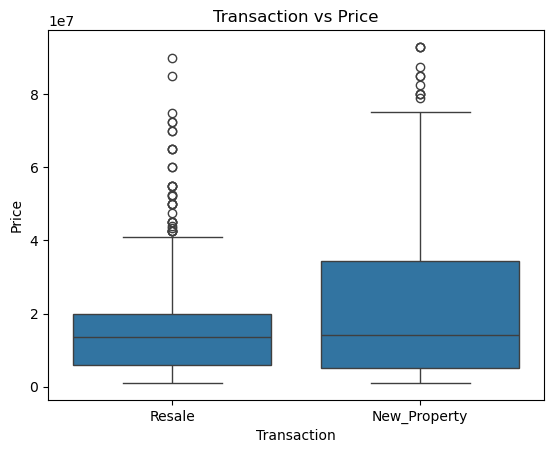

In [74]:
sns.boxplot(x = 'Transaction', y = 'Price', data = df).set_title('Transaction vs Price')

As expected the new properties have higher price than old ones/ resale ones. The
new properties attracts more buyers to make features including reliability, designs.
Whereas the resale one sometimes poses doubts for the buyers.

Property Type and Price

Text(0.5, 1.0, 'Price vs Type')

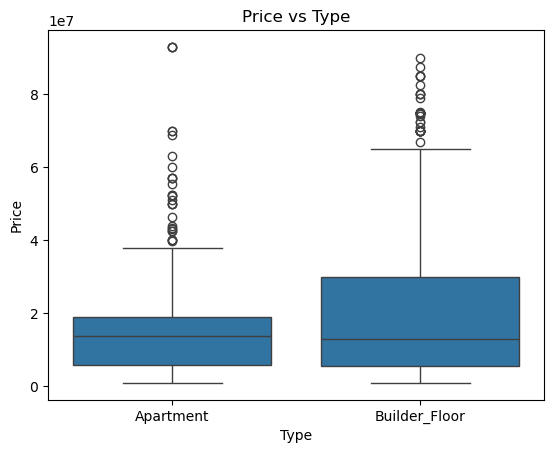

In [77]:
sns.boxplot(x = 'Type', y = 'Price', data = df).set_title('Price vs Type')

Both the Builder Floor and Apartment type houses have nealry same median price
with Apartment type houses having slightly higher median price. However, the builder
floor type houses are more in number which means people are more interested in
buying builder floor type houses.

Data Preprocessing 2

Label encoding the categorical variables


In [81]:
df

,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price,Area_Yards
0,950.0,2,2,Furnished,Karol Bagh,Central Delhi,Karol Bagh,1,Ready_to_move,Resale,Apartment,13157.894737,12500000,105.555556
1,535.0,2,1,Furnished,Karol Bagh,Central Delhi,Karol Bagh,1,Ready_to_move,New_Property,Apartment,7289.719626,3900000,59.444444
2,1280.0,3,3,Furnished,Karol Bagh,Central Delhi,Karol Bagh,2,Ready_to_move,Resale,Builder_Floor,11718.750000,15000000,142.222222
3,1135.0,3,3,Furnished,Karol Bagh,Central Delhi,Karol Bagh,2,Almost_ready,Resale,Apartment,22026.431718,25000000,126.111111
4,1135.0,3,3,Furnished,Karol Bagh,Central Delhi,Karol Bagh,2,Almost_ready,Resale,Apartment,22026.431718,25000000,126.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,2306.0,3,3,Unfurnished,Patel Nagar,West Delhi,Other,1,Almost_ready,New_Property,Apartment,24718.126626,57000000,256.222222
1210,3901.0,4,4,Unfurnished,Patel Nagar,West Delhi,Other,1,Almost_ready,New_Property,Apartment,23840.041015,93000000,433.444444
1211,2306.0,3,3,Unfurnished,Patel Nagar,West Delhi,Other,1,Almost_ready,New_Property,Apartment,24718.126626,57000000,256.222222
1212,675.0,2,1,Unfurnished,Uttam Nagar,West Delhi,Other,1,Ready_to_move,Resale,Builder_Floor,4296.296296,2900000,75.000000


In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Columns for label encoding
cols = ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']
for i in cols:
 le.fit(df[i])
 df[i] = le.transform(df[i])
 print(i, df[i].unique())


Furnishing [0 1 2]
Locality [ 3  6  7  5  8  9  0  4 10  1  2]
Status [1 0]
Transaction [1 0]
Type [0 1]


Normalizing the continuous features

In [84]:
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
continuous_cols = ['Price', 'Area', 'Area_Yards', 'Per_Sqft']

scaler = MinMaxScaler()

# Fit and transform the continuous columns
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

print("Normalized DataFrame head:")
print(df.head())

Normalized DataFrame head:
       Area  BHK  Bathroom  Furnishing    Location       District  Locality  \
0  0.174081    2         2           0  Karol Bagh  Central Delhi         3   
1  0.093810    2         1           0  Karol Bagh  Central Delhi         3   
2  0.237911    3         3           0  Karol Bagh  Central Delhi         3   
3  0.209865    3         3           0  Karol Bagh  Central Delhi         3   
4  0.209865    3         3           0  Karol Bagh  Central Delhi         3   

   Parking  Status  Transaction  Type  Per_Sqft     Price  Area_Yards  
0        1       1            1     0  0.185596  0.125000    0.174081  
1        1       1            0     0  0.101519  0.031522    0.093810  
2        2       1            1     1  0.164976  0.152174    0.237911  
3        2       0            1     0  0.312659  0.260870    0.209865  
4        2       0            1     0  0.312659  0.260870    0.209865  


Coorelation Matrix Heatmap

In [86]:
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

                 Area       BHK  Bathroom  Furnishing  Locality   Parking  \
Area         1.000000  0.709309  0.772867   -0.016838 -0.119542  0.292988   
BHK          0.709309  1.000000  0.770652   -0.104506 -0.085535  0.221563   
Bathroom     0.772867  0.770652  1.000000   -0.009050 -0.092607  0.300089   
Furnishing  -0.016838 -0.104506 -0.009050    1.000000 -0.043111 -0.029780   
Locality    -0.119542 -0.085535 -0.092607   -0.043111  1.000000  0.011031   
Parking      0.292988  0.221563  0.300089   -0.029780  0.011031  1.000000   
Status      -0.109517 -0.101185 -0.121118   -0.036822 -0.003729 -0.017288   
Transaction -0.133747 -0.157032 -0.212061   -0.023786 -0.031974 -0.055017   
Type         0.106862  0.147598  0.194115    0.010799  0.168071  0.101859   
Per_Sqft     0.313187  0.313972  0.433470   -0.003072 -0.051699  0.197066   
Price        0.826277  0.626613  0.769254   -0.002096 -0.082914  0.323076   
Area_Yards   1.000000  0.709309  0.772867   -0.016838 -0.119542  0.292988   

<Axes: >

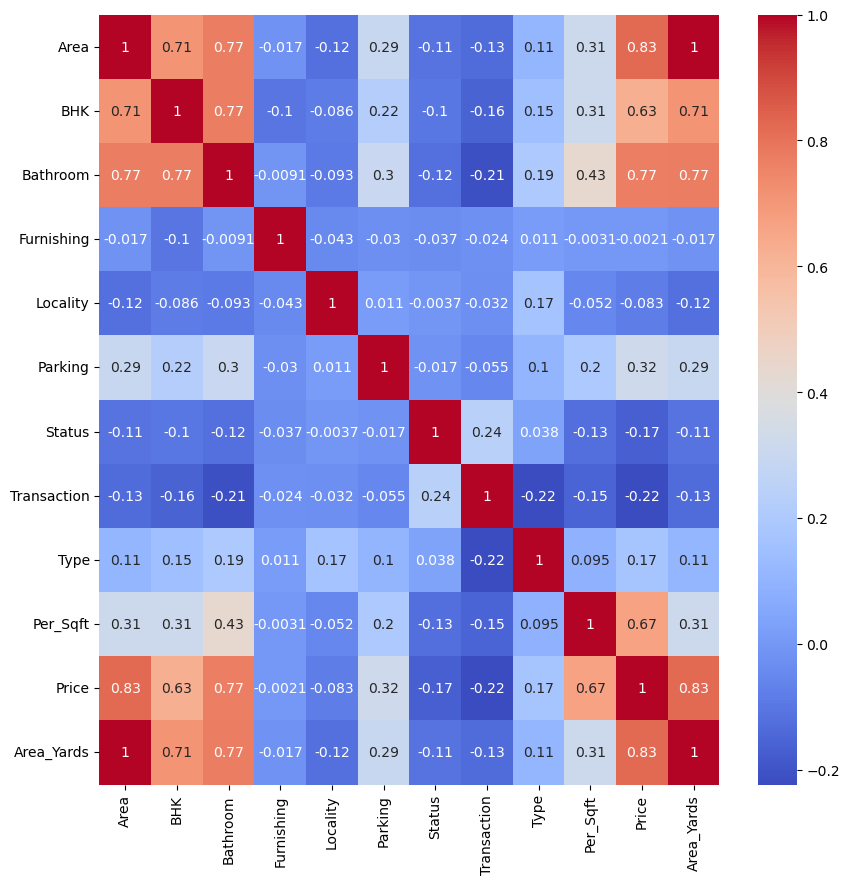

In [87]:
plt.figure(figsize=(10, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')

In this coorelation matrix heatmap, we can see that the price of the house has high
positive coorelation with land area, BHK, bathroom count, which proves are previous
obersevation about their relation.

Price Prediction

I will be using the following models: 
Linear Regression
Decision Tree Regressor
Random Forest Regressor

Train Test Split

In [92]:
# Dropping Per_Sqft column
numerical_df.drop(['Per_Sqft'],axis=1,inplace=True)

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
# Assuming 'Price' is the target variable and the other numerical columns are features
# You might want to refine the features based on your analysis (e.g., correlation matrix)
X = numerical_df.drop(['Price'], axis=1) # Features
y = numerical_df['Price'] # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.010106238609247828
Root Mean Squared Error: 0.1005297896608156
R-squared: 0.7564886508050536


In [94]:
check =pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
check.reset_index(drop=True, inplace=True)
check.head(10)


,Actual,Predicted
0,0.032609,0.088312
1,0.195652,0.211479
2,0.239130,0.174324
3,0.233696,0.261803
4,0.451087,0.564190
5,0.250000,0.348254
6,0.160870,0.160618
7,0.190217,0.179641
8,0.016304,0.064979
9,0.358696,0.287643


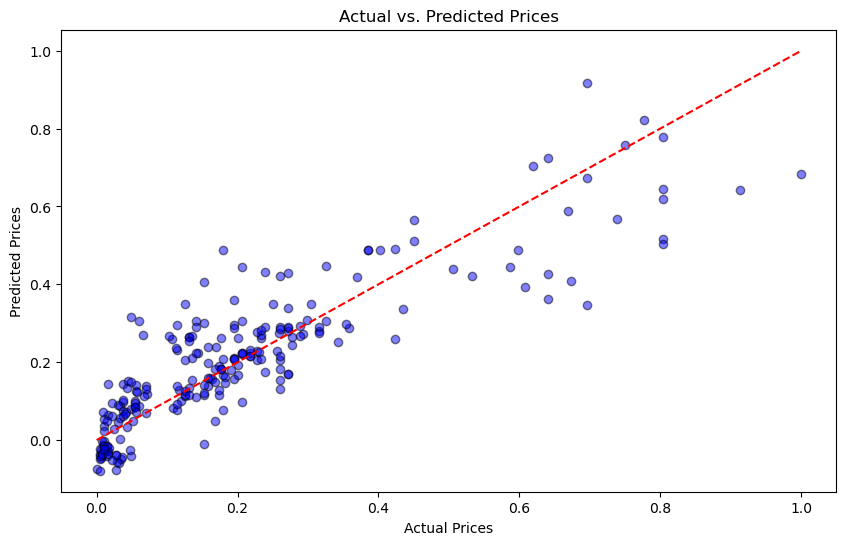

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()


Decision Tree Regressor

In [97]:
from sklearn.tree import DecisionTreeRegressor
#creating Decision Tree Regressor object
dtr = DecisionTreeRegressor()

In [98]:
from sklearn.model_selection import GridSearchCV
# Defining parameters
parameters = {'max_depth':[2,4,6,8],
 'min_samples_split':[2,4,6,8],
 'min_samples_leaf':[1,2,3,4],
 'max_features':[None,'sqrt','log2'],
 'random_state':[0,42]}
# Creating GridSearchCV object
grid_search = GridSearchCV(dtr, parameters, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Fitting data to grid search object
grid_search.fit(X_train, y_train)
# Best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 0}


C:\Users\anura\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [99]:
dtr = DecisionTreeRegressor( max_depth=6, max_features=None, min_samples_split=8,random_state=42)
dtr


DecisionTreeRegressor(max_depth=6, min_samples_split=8, random_state=42)

In [100]:
# Training the model
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_split=8, random_state=42)

In [101]:
# Training Accuracy
dtr.score(X_train, y_train)

0.872052153482839

In [102]:
# Predicting the house price
d_pred = dtr.predict(X_test)

In [103]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)
dft.head(10)


,Actual,Predicted
0,0.032609,0.078507
1,0.195652,0.164529
2,0.239130,0.243012
3,0.233696,0.255540
4,0.451087,0.589291
5,0.250000,0.103261
6,0.160870,0.164529
7,0.190217,0.242935
8,0.016304,0.054900
9,0.358696,0.346739


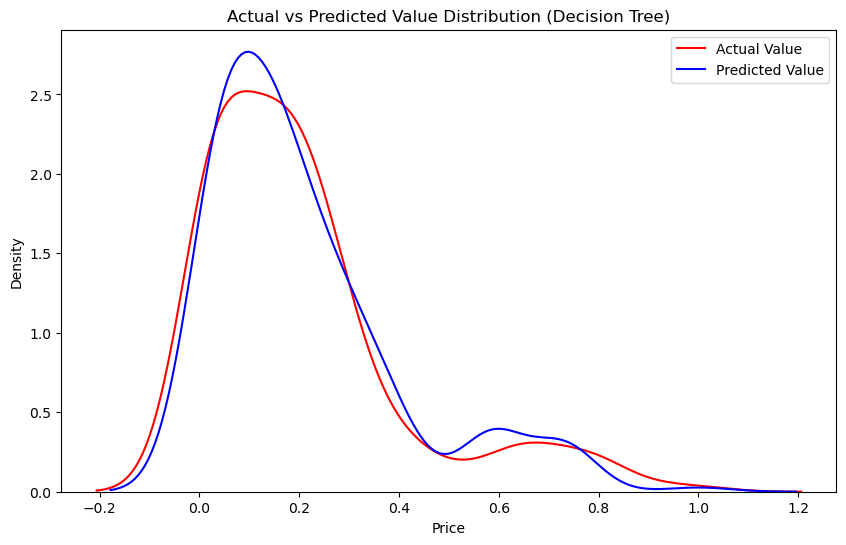

In [104]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color='red', label='Actual Value')
sns.kdeplot(d_pred, color='blue', label='Predicted Value')
plt.title('Actual vs Predicted Value Distribution (Decision Tree)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

In [105]:
# Evaluate the model
mse_dt = mean_squared_error(y_test, d_pred)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, d_pred)

print("\nDecision Tree Regressor Results:")
print(f"Mean Squared Error: {mse_dt}")
print(f"Root Mean Squared Error: {rmse_dt}")
print(f"R-squared: {r2_dt}")


Decision Tree Regressor Results:
Mean Squared Error: 0.009275282776781373
Root Mean Squared Error: 0.09630826951400058
R-squared: 0.7765106573802948


Random Forest Regressor

In [107]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regressor Object
rfr = RandomForestRegressor()
rfr


RandomForestRegressor()

In [108]:
# Training the model
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [109]:
# Training Accuracy
rfr.score(X_train, y_train)

0.9630086854637958

In [110]:
# Predicting the house price
r_pred = rfr.predict(X_test)

Evaluating the Random Forest Regressor Model

In [112]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)

,Actual,Predicted
0,0.032609,0.086916
1,0.195652,0.188782
2,0.239130,0.234174
3,0.233696,0.241111
4,0.451087,0.557674
5,0.250000,0.211737
6,0.160870,0.145819
7,0.190217,0.199047
8,0.016304,0.041617
9,0.358696,0.443179


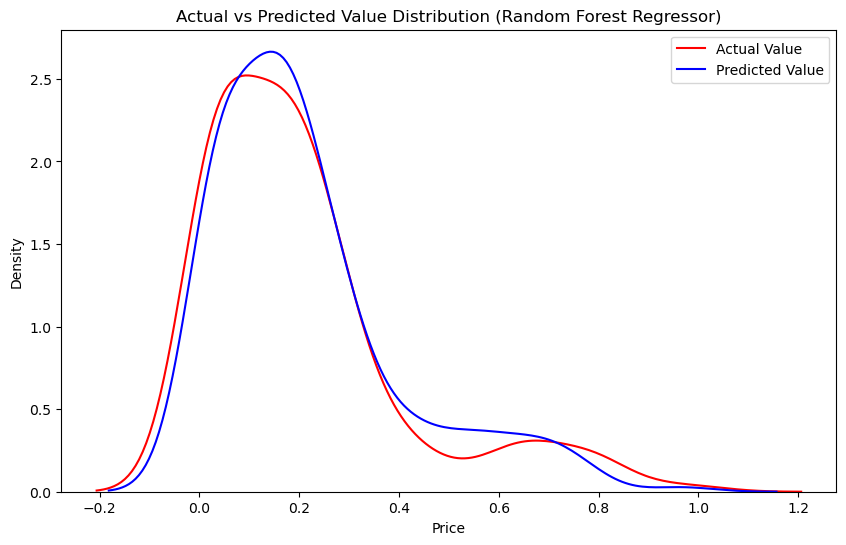

In [113]:
plt.figure(figsize=(10, 6))
sns.kdeplot(dfr['Actual'], color='red', label='Actual Value')
sns.kdeplot(dfr['Predicted'], color='blue', label='Predicted Value')
plt.title('Actual vs Predicted Value Distribution (Random Forest Regressor)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

In [114]:
# Evaluate the Random Forest Regressor model
from sklearn.metrics import mean_absolute_error
mse_rfr = mean_squared_error(y_test, r_pred)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, r_pred)
mae_rfr = mean_absolute_error(y_test, r_pred)
print("\nDecision Tree Regressor Results:")
print(f"Mean Squared Error: {mse_rfr}")
print(f"Root Mean Squared Error: {rmse_rfr}")
print(f"Mean Absolute Error: {mae_rfr}" )
print(f"R-squared: {r2_rfr}")


Decision Tree Regressor Results:
Mean Squared Error: 0.007545870544478249
Root Mean Squared Error: 0.08686697038850986
Mean Absolute Error: 0.049814529892600184
R-squared: 0.81818110691995


conclusion:

In this project, we developed a machine learning model to predict house prices in Delhi using a dataset sourced from Kaggle. The dataset included key features such as area, number of bedrooms, locality, and other property characteristics. Through data preprocessing, exploratory analysis, and model training, we gained valuable insights into the factors influencing house prices. The resulting predictive model can assist potential buyers, sellers, and real estate analysts in making more informed decisions.

Insights:

Location Matters: Locality plays a major role in determining property prices. Premium areas tend to have significantly higher prices even for similar-sized houses.
Size Influences Price: There is a clear positive correlation between the area (in square feet) and the house price. Larger properties generally command higher prices.
Number of Bedrooms (BHK): Although not as strong as area or location, the number of bedrooms is also a contributing factor, with more bedrooms usually associated with higher prices.
Model Performance:
Linear Regression gave a baseline prediction capability but was limited by its simplicity and assumptions of linearity.
Decision Tree Regressor improved performance by capturing nonlinear patterns, though at the risk of overfitting.
Random Forest Regressor outperformed both, offering a better balance between accuracy and generalization with higher R² and lower RMSE.
Data Quality & Outliers: Outlier removal (via Z-score) was crucial in improving model performance and reducing prediction errors.